# Homework



## CNN

Multiclass classify lowercase alphabet images.<br>
Fill in the model creation and execute it properly, and check the results.<br>
Read and use necessary libraries as needed.

In [40]:
!pip install seaborn japanize-matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LSTM, Masking
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import japanize_matplotlib
import os
import io
import cv2
import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences

### About dataset

#### Data description



HandDB_Lower_Alphabet.npz records images and their correct labels in lowercase a to z.<br>
This image was created from online character and is 32x32 in size.



#### Loading data


--2024-05-15 06:13:27--  https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ
Resolving drive.google.com (drive.google.com)... 142.250.98.100, 142.250.98.113, 142.250.98.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ&export=download [following]
--2024-05-15 06:13:27--  https://drive.usercontent.google.com/download?id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1030317 (1006K) [application/octet-stream]
Saving to: ‘HandDB_Lower_Alphabet.npz’

HandDB_Lower_Alphab 100%[===================>]   1

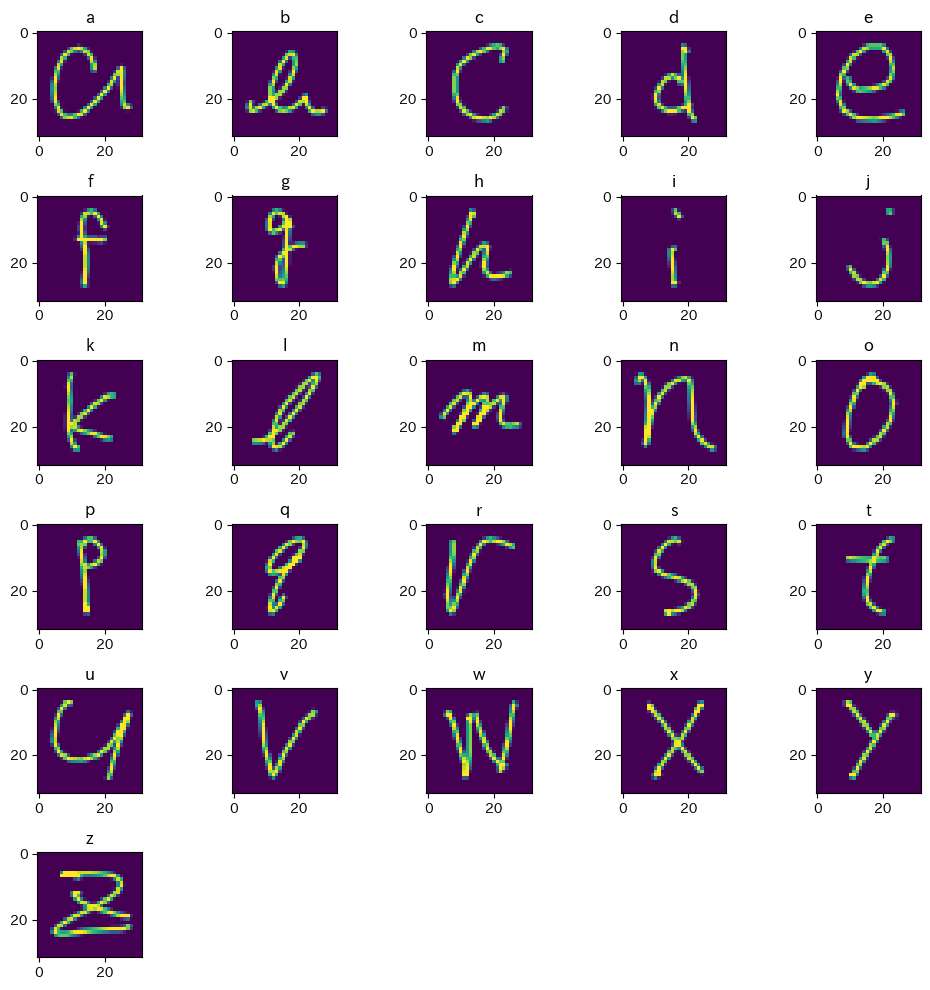

In [41]:
!wget "https://drive.google.com/uc?export=download&id=1vzvJj-fXsnuBHVe0mZXu-0gNv-bTgfiZ" -O HandDB_Lower_Alphabet.npz

data = np.load('HandDB_Lower_Alphabet.npz', allow_pickle=True)
X = data['x']
y = data['y']
n2c = data['n2c'].item()

# View data
fig = plt.figure(figsize=(10, 10))
for i in range(len(n2c)):
    ax = fig.add_subplot(6, 5, i+1)
    ax.imshow(X[y.tolist().index(i)].reshape(X.shape[1], X.shape[2]))
    ax.set_title(n2c[i])
plt.tight_layout()
plt.show()

#### Data normalization

In [42]:
X /= 255

from tensorflow.keras import backend as K
img_rows, img_cols, img_channels = X.shape[1:]
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

#### Split into training and test data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### About the model

#### Parameters

Adjust the parameters yourself and see the changes.

In [44]:
batch_size = 128
num_classes = len(n2c)
epochs = 20

#### Model creation

Create a CNN model. See what happens when you change layers. Check the change by Loss and Optimizer at compile time.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Model visualization

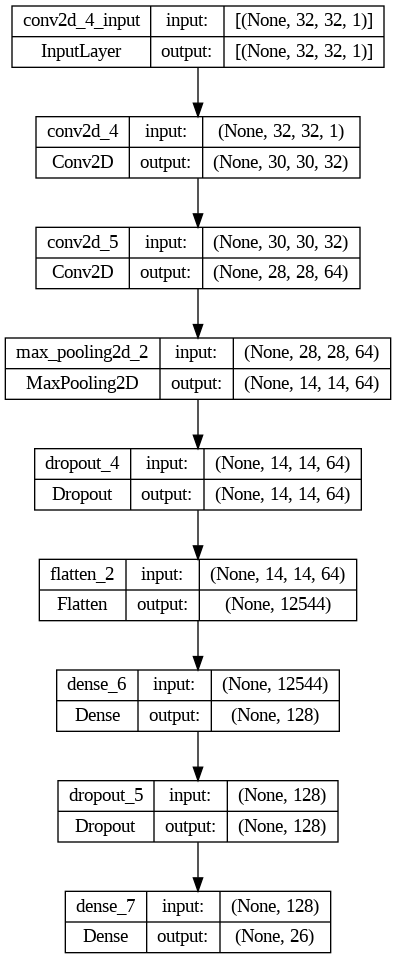

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#### Learning the model

In [47]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
18/18 [==============================] - 15s 763ms/step - loss: 2.2614 - accuracy: 0.3630 - val_loss: 0.9889 - val_accuracy: 0.7197
Epoch 2/20
18/18 [==============================] - 15s 820ms/step - loss: 1.1318 - accuracy: 0.6665 - val_loss: 0.7092 - val_accuracy: 0.8083
Epoch 3/20
18/18 [==============================] - 13s 662ms/step - loss: 0.8612 - accuracy: 0.7491 - val_loss: 0.5830 - val_accuracy: 0.8475
Epoch 4/20
18/18 [==============================] - 9s 499ms/step - loss: 0.6845 - accuracy: 0.7978 - val_loss: 0.5047 - val_accuracy: 0.8566
Epoch 5/20
18/18 [==============================] - 7s 384ms/step - loss: 0.6019 - accuracy: 0.8222 - val_loss: 0.4405 - val_accuracy: 0.8735
Epoch 6/20
18/18 [==============================] - 9s 498ms/step - loss: 0.4766 - accuracy: 0.8574 - val_loss: 0.4115 - val_accuracy: 0.8722
Epoch 7/20
18/18 [==============================] - 7s 387ms/step - loss: 0.3759 - accuracy: 0.8861 - val_loss: 0.3556 - val_accuracy: 0.8892
Epo

### About the result


#### Accuracy for test data

In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29955199360847473
Test accuracy: 0.9269882440567017


#### Visualize the learning process

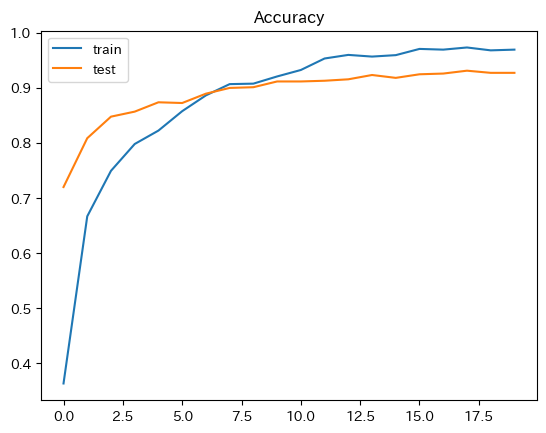

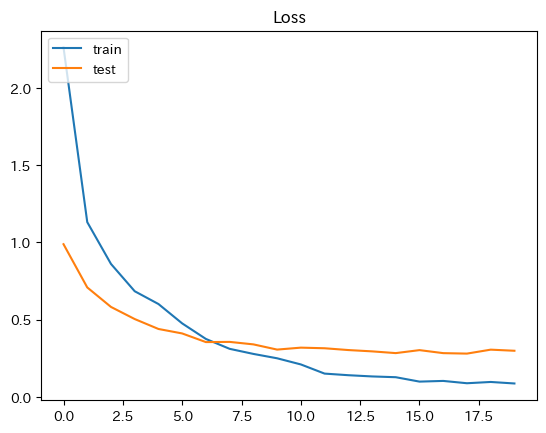

In [49]:
# Plot transition of accuracy rate
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot loss transition
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Confusion matrix for test data

24/24 [==============================] - 1s 26ms/step


<Axes: >

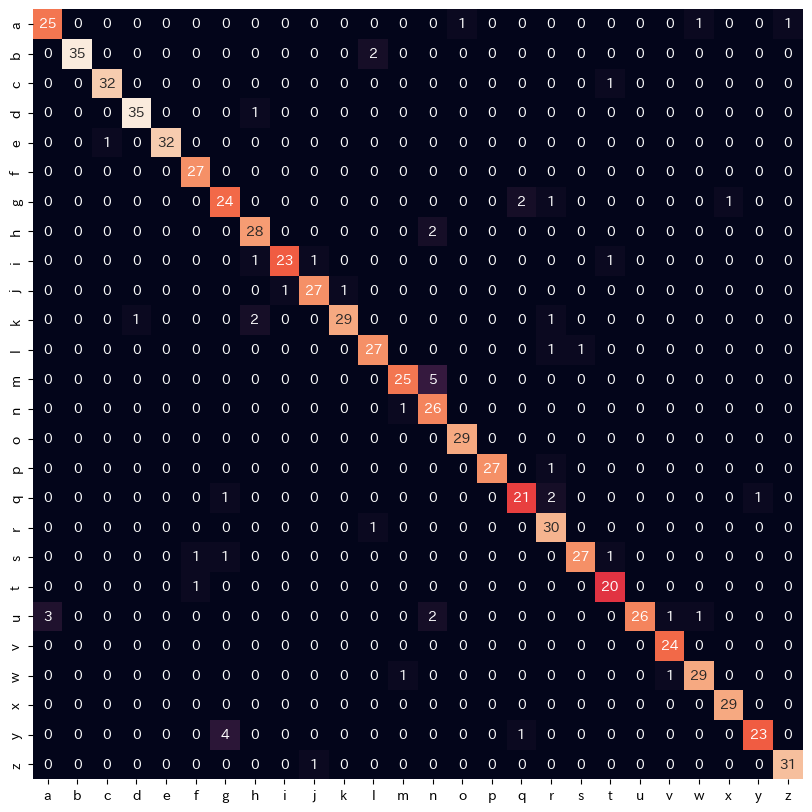

In [50]:
import seaborn as sns
predicted = np.argmax(model.predict(X_test), axis=1)
cmx = confusion_matrix(y_test, predicted)
df_cmx = pd.DataFrame(cmx, index=n2c.values(), columns=n2c.values())
plt.figure(figsize = (10,10))
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt="d")

## RNN
Identify the signature data of the online characters as the person or another person.(Signature Verification)<br>
In writer authentication, a model is created for each user, and the user is classified as a binary.

### About dataset

#### Data description
SVC2004_Task1_5users.npz records signature data of five online characters.<br>
The online characters are padded with -1 to fill in the missing parts to make them all the same length.<br>
The following data is recorded in addition to the online character data.

*  Target user
*  Written or fake by another person
*  Actual data length

The following data is recorded in online character data.

* Stroke Number - current stroke number (if -1, pen-up state)
* X-coordinate - scaled cursor position along the x-axis
* Y-coordinate - scaled cursor position along the y-axis
* Time stamp - system time at which the event was posted

#### Loading data

In [51]:
!wget "https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z" -O SVC2004_Task1_5users.npz

data = np.load("SVC2004_Task1_5users.npz")

X = data["x"]
user = data["user"]
genuine = data["genuine"]
X_length = data["x_length"]

num_user = max(user) + 1
timesteps, features = X.shape[-2:]
print("Number of Users:", num_user)
print("Timesteps:", timesteps)
print("Features:", features)

--2024-05-15 06:17:29--  https://drive.google.com/uc?export=download&id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z
Resolving drive.google.com (drive.google.com)... 142.250.98.100, 142.250.98.138, 142.250.98.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z&export=download [following]
--2024-05-15 06:17:29--  https://drive.usercontent.google.com/download?id=1Xbs8tNR8G59ptaLETc6dU44G0agFmC8z&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360007 (352K) [application/octet-stream]
Saving to: ‘SVC2004_Task1_5users.npz’

SVC2004_Task1_5user 100%[===================>] 351.57

#### View data

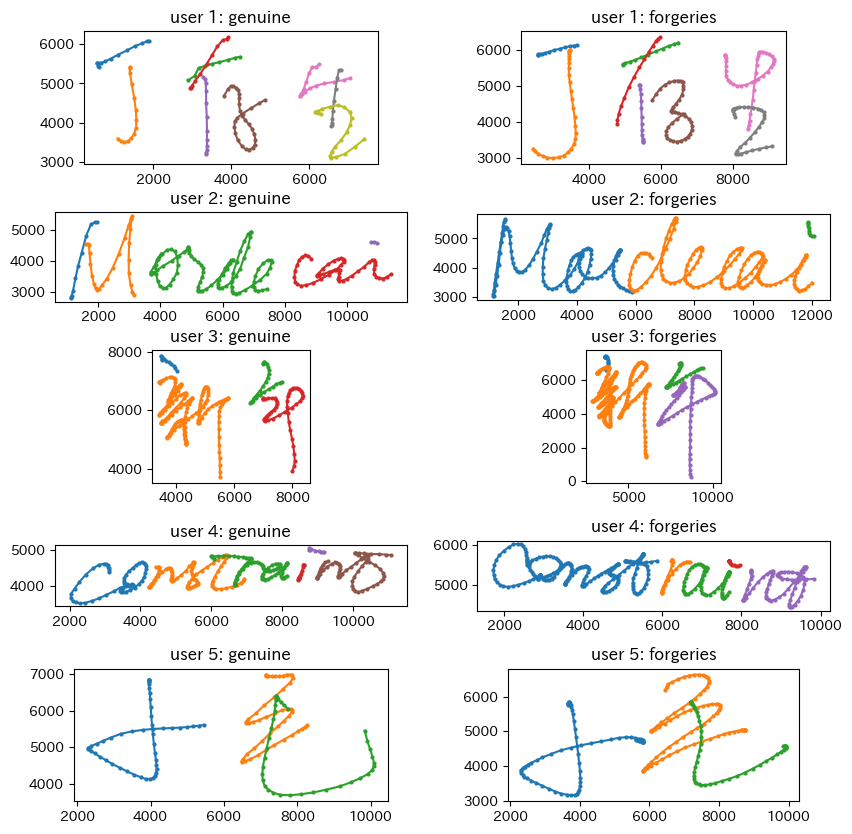

In [59]:
fig = plt.figure(figsize=(10, 10))
for i in range(num_user):
  for j in range(2):
    data = X[user==i][j*20]
    n_stroke = data[:, 0].max()
    ax = fig.add_subplot(5, 2, i*2+j+1)
    for i_stroke in range(n_stroke+1):
      ax.plot(*data[data[:, 0]==i_stroke][:, [1, 2]].T, marker='o', markersize=2)
      ax.set_title(f'user {i+1}: {"genuine" if j == 0 else "forgeries"}')
      ax.set_aspect('equal')
plt.show()

### Required functions




#### Function to reset keras

In [53]:
import gc
from tensorflow.keras.backend import clear_session
import tensorflow as tf

# Reset Keras Session
def reset_keras():
    clear_session()
    gc.collect()

#### Function to get EER (Equal Error Rate)

In [54]:
from sklearn.metrics import roc_curve

def get_eer(y_true, y_score):
  fpr, tpr, threshold = roc_curve(y_true, y_score, pos_label=1)
  fnr = 1 - tpr
  eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
  EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
  return EER

### About the model

#### Model creation
* Create an RNN model. Check the change when the structure is changed.
* Check the change by Loss and Optimizer at compile time.

In [55]:
def build_model(input_shape):
    model = Sequential()
    model.add(Masking(mask_value=-1., input_shape=(timesteps, features)))
    model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

#### Hyperparameters
* Adjust the parameters yourself and see the changes.

In [56]:
batch_size = 128
epochs = 100

#### Learning the model

In [57]:
train_EER_list = []
test_EER_list = []
test_size = 0.2
for user_index in range(num_user):
  print("user_index:", user_index)
  mask = user == user_index
  X_train, X_test, y_train, y_test = train_test_split(X[mask], genuine[mask], test_size=test_size, random_state=7, shuffle=True, stratify=genuine[mask])
  model = build_model(input_shape=(timesteps, features))
  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_eer = get_eer(y_train, pred_train)
  test_eer = get_eer(y_test, pred_test)
  print("train EER(%):", train_eer*100)
  print("test EER(%):", test_eer*100)
  train_EER_list.append(train_eer*100)
  test_EER_list.append(test_eer*100)
  del model
  reset_keras()
  gc.collect()

user_index: 0
Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6632 - accuracy: 0.5312 - val_loss: 0.4731 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.5405 - accuracy: 0.8750 - val_loss: 0.5129 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.5435 - accuracy: 0.8438 - val_loss: 0.4961 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.5062 - accuracy: 0.9375 - val_loss: 0.4672 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.4920 - accuracy: 0.9062 - val_loss: 0.4569 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.4836 - accuracy: 0.9375 - val_loss: 0.4582 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.4691 - accuracy: 0.9375 - val_loss: 0.4466 - val_accuracy: 1.0000
Epoch 8/100
1/1 [===

1/1 [==============================] - 1s 940ms/step
train EER(%): 18.75
test EER(%): 25.0
user_index: 2
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.5912 - accuracy: 0.7812 - val_loss: 0.5185 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.5064 - accuracy: 0.9375 - val_loss: 0.5213 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.4635 - accuracy: 0.9062 - val_loss: 0.5092 - val_accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.4666 - accuracy: 0.9062 - val_loss: 0.4763 - val_accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.4423 - accuracy: 0.9062 - val_loss: 0.4375 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.4260 - accuracy: 0.9688 - val_loss: 0.4223 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 2s 2s/step - los

1/1 [==============================] - 0s 410ms/step
train EER(%): 0.0
test EER(%): 0.0
user_index: 3
Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.7697 - accuracy: 0.4375 - val_loss: 0.6650 - val_accuracy: 0.6250
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.6601 - accuracy: 0.5938 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.6548 - accuracy: 0.6562 - val_loss: 0.6505 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.6145 - accuracy: 0.7812 - val_loss: 0.6466 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.6172 - accuracy: 0.8125 - val_loss: 0.6423 - val_accuracy: 0.6250
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.6041 - accuracy: 0.8125 - val_loss: 0.6359 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 

### About result

#### Evaluation of accuracy

In [58]:
print("Average Train EER(%):", np.mean(train_EER_list))
print("Average Test EER(%):", np.mean(test_EER_list))

Average Train EER(%): 5.0
Average Test EER(%): 10.0
